# Zillow's Data Cleanup

### Group: Jonathan Chadi, Vijay Das, Andrew Kosturos

### Notebook Outline:

For our project we used data exclusively from Zillow. Zillow provides real estate rental and sales data for the United States. Throughout our data collection and analysis, we chose to analyze data on the metro level instead of city, state, or country wide. We believe that American cities widely differ in their level of centralization and density. For example New York City is a densely populated and centralized city whereas Boston is comprised of a set of neighborhoods that may lie outside city limits but are still connected by the T. Therefore metro areas should encompass the economic impacts within a defined subset of the country. Within this constraint we used measures including median sales price/ sqft, rent/ sqft, negative equity, foreclosures adjusted by number of homes in a region, age of inventory, and the median price reduction. We used a Jupyter Notebook to read the CSVs and clean the data. After this step is completed, we will begin to create analysis using Pandas, Matplotlib, Ploty, and Seaborn


## Import Packages

In [209]:
import sys                             # system module
import pandas as pd                    # data package
import matplotlib.pyplot as plt        # graphics module  
import datetime as dt                  # date and time module
import numpy as np                     # foundation for Pandas
import seaborn.apionly as sns          # fancy matplotlib graphics (no styling)
from pandas_datareader import wb, data as web  # worldbank data

# plotly imports
from plotly.offline import iplot, iplot_mpl  # plotting functions
import plotly.graph_objs as go               # ditto
import plotly                                # just to print version and init notebook
import cufflinks as cf                       # gives us df.iplot that feels like df.plot
cf.set_config_file(offline=True, offline_show_link=False)

import scipy as scipy
from scipy import stats
from scipy.stats import mstats
from scipy.stats.mstats import gmean

# these lines make our graphics show up in the notebook
%matplotlib inline             
plotly.offline.init_notebook_mode(connected=True)

# check versions (overkill, but why not?)
print('Python version:', sys.version)
print('Pandas version: ', pd.__version__)
print('Plotly version: ', plotly.__version__)
print('Today: ', dt.date.today())

Python version: 3.5.2 |Anaconda 4.1.1 (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]
Pandas version:  0.18.1
Plotly version:  1.12.12
Today:  2016-12-20


# Data Set Analysis/Cleanup

## Median Sold Price

In [393]:
#Median Sold Price
url1 = 'http://files.zillowstatic.com/research/public/'
url2 = 'Metro/Metro_MedianSoldPrice_AllHomes.csv' # Url Download Address of Data Source
url  = url1 + url2        # location of file

sale_price = pd.read_csv(url)     # read file and assign it to df_saleprice

sale_price = sale_price.drop(['RegionID', 'SizeRank'], axis=1) # Here we dropped the given 'RegionID', which the source used
sale_price = sale_price.set_index('RegionName')
sale_price = sale_price.groupby(pd.PeriodIndex(sale_price.columns, freq='Q'), axis=1).mean()
sale_price.head(5)

,1996Q2,1996Q3,1996Q4,1997Q1,1997Q2,1997Q3,1997Q4,1998Q1,1998Q2,1998Q3,...,2014Q1,2014Q2,2014Q3,2014Q4,2015Q1,2015Q2,2015Q3,2015Q4,2016Q1,2016Q2
RegionName,,,,,,,,,,,,,,,,,,,,,
United States,111491.666667,114966.666667,113669.166667,110630.833333,113611.033333,118467.633333,118505.000000,117745.000000,121091.666667,125800.000000,...,182057.650000,192457.916667,198811.333333,191050.000000,189916.666667,205333.333333,212425.000000,207325.000000,204516.666667,222658.333333
"New York, NY",157600.000000,164916.666667,160383.333333,159064.666667,160414.666667,167800.000000,164766.666667,164900.000000,167638.333333,178078.333333,...,362125.000000,359553.333333,386013.333333,369161.666667,364750.000000,369500.000000,396555.000000,380078.333333,369216.666667,388233.333333
"Los Angeles-Long Beach-Anaheim, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,484900.000000,515783.333333,521250.000000,513583.333333,515966.666667,540116.666667,545250.000000,535250.000000,544716.666667,565933.333333
"Chicago, IL",137058.333333,142716.666667,136550.000000,133558.333333,136058.333333,142650.000000,137225.000000,136200.000000,141286.166667,147727.833333,...,194800.000000,216216.666667,229291.666667,211583.333333,198916.666667,226533.333333,235550.000000,216250.000000,207641.666667,234108.333333
"Dallas-Fort Worth, TX",109193.333333,111237.500000,109887.000000,93177.483333,97900.150000,100243.666667,98834.033333,98144.366667,103414.283333,107286.583333,...,181461.716667,192470.950000,197695.766667,195527.283333,198524.233333,214597.433333,210023.583333,203473.033333,205764.250000,221461.416667


In [397]:
sp_change = sale_price.T
sp_change = sp_change['United States']
sp_change = 100* sp_change.pct_change()
sp_change.head(5)

1996Q2         NaN
1996Q3    3.116825
1996Q4   -1.128588
1997Q1   -2.672962
1997Q2    2.693824
Freq: Q-DEC, Name: United States, dtype: float64

103.116824875
101.953060767
99.2278944615
101.900919351
106.256939981
106.290455191
105.608789895
108.610509007
112.833545108
111.645115479
111.111443307
113.723282757
117.876089394
116.839823604
116.940728007
120.326631288
124.874803797
124.718095523
124.291845429
126.909335526
133.027879513
131.310262351
133.870991853
137.037147769
142.738919202
143.785335227
144.204798565
147.694446521
155.492936692
156.573734958
157.93407579
164.042110771
170.75301592
172.281485911
177.947081247
186.329322072
195.642424695
197.249420734
197.680843112
198.688392257
200.239180806
198.159653188
196.855370357
195.165692503
195.936632035
188.110920099
183.003213992
182.719186785
183.622662381
174.077315195
164.501083788
161.261708648
164.476418267
156.907048359
155.446087152
156.244936094
165.711936617
159.118140369
151.051648105
153.342282682
157.427117124
149.163166156
138.575797892
150.833545108
159.784453248
156.181627924
150.609163615
162.927139547
172.322296136
167.096539353
163.292607818
172.6208

ValueError: Given date string not likely a datetime.

## Negative Equity

In [362]:
# Negative Equity

url3 = 'http://files.zillowstatic.com/research/public/NegativeEquity_2016Q2_Public.csv'
neg_equity = pd.read_csv(url3)

neg_equity = neg_equity[(neg_equity.RegionType == 'Metro') | 
                  (neg_equity.RegionType == 'Country')]

# Here, there were several region types outside of metro region
# We this code to remove any regional definitions except for 'Metro' and 'Country'

neg_equity = neg_equity.drop(['RegionID','RegionType','StateRegionID',
                                            'StateName','MSARegionID','MSA',
                                            'CountyRegionID','CountyName','CityRegionID',
                                            'City', 'SizeRank'], axis=1)

neg_equity = neg_equity.set_index('RegionName') # this is to set our index = RegionName

neg_equity.head(5) #final output

,2011Q2,2011Q3,2011Q4,2012Q1,2012Q2,2012Q3,2012Q4,2013Q1,2013Q2,2013Q3,...,2014Q1,2014Q2,2014Q3,2014Q4,2015Q1,2015Q2,2015Q3,2015Q4,2016Q1,2016Q2
RegionName,,,,,,,,,,,,,,,,,,,,,
United States,0.300369,0.305753,0.311151,0.314121,0.309264,0.282382,0.274634,0.254470,0.237668,0.209519,...,0.188348,0.178899,0.169462,0.168938,0.154062,0.144341,0.134320,0.130890,0.127187,0.121129
"New York, NY",0.212398,0.199129,0.200621,0.212904,0.207212,0.194124,0.193620,0.190139,0.186754,0.173122,...,0.156880,0.144718,0.135596,0.130970,0.123809,0.119948,0.115208,0.113590,0.113216,0.110467
"Los Angeles-Long Beach-Anaheim, CA",0.277986,0.271344,0.286226,0.300373,0.286021,0.259028,0.243093,0.212913,0.183915,0.131515,...,0.116060,0.104508,0.093581,0.085712,0.081385,0.078089,0.070647,0.069241,0.065965,0.060904
"Chicago, IL",0.390891,0.379829,0.392282,0.411453,0.391707,0.365841,0.368708,0.361107,0.353860,0.322652,...,0.281352,0.267684,0.253172,0.251162,0.236663,0.219933,0.205680,0.204838,0.202928,0.189739
"Dallas-Fort Worth, TX",0.267844,0.276826,0.297943,0.306680,0.289224,0.257367,0.242307,0.204348,0.164504,0.130560,...,0.130153,0.101034,0.092661,0.085755,0.069457,0.061933,0.057640,0.057879,0.053541,0.047703


In [193]:
ne_change = neg_equity.T
ne_change = ne_change['United States']
ne_change = 100* ne_change.pct_change()
ne_change.head(5)

2011Q2         NaN
2011Q3    1.792465
2011Q4    1.765567
2012Q1    0.954493
2012Q2   -1.546367
Name: United States, dtype: float64

## Homes Foreclosed per 10k homes

In [103]:
# Homes Foreclosed per 10k homes

url4 = 'http://files.zillowstatic.com/research/public/Metro/'
url5 = 'Metro_HomesSoldAsForeclosures-Ratio_AllHomes.csv'
url4 = url4 + url5

foreclosure = pd.read_csv(url4)

#Because we got our data from a centralized source, we could use the same cleanup techniques

foreclosure = foreclosure.drop(['RegionID','SizeRank'], axis=1) # Here we dropped the given 'RegionID', which the source used
foreclosure = foreclosure.set_index('RegionName') # We wanted to set the index equal to the population size of metro areas
foreclosure = foreclosure.groupby(pd.PeriodIndex(foreclosure.columns, freq='Q'), axis=1).mean()
foreclosure.head(5)

,1998Q1,1998Q2,1998Q3,1998Q4,1999Q1,1999Q2,1999Q3,1999Q4,2000Q1,2000Q2,...,2014Q3,2014Q4,2015Q1,2015Q2,2015Q3,2015Q4,2016Q1,2016Q2,2016Q3,2016Q4
RegionName,,,,,,,,,,,,,,,,,,,,,
United States,1.848300,1.860500,1.7800,1.673433,1.572667,1.370933,1.257033,1.191567,1.248100,1.235067,...,4.713067,4.671333,4.530033,4.455433,3.941533,3.703900,3.663633,2.914500,1.115967,0.7393
"New York, NY",0.490133,0.563233,0.6011,0.571500,0.590500,0.625667,0.600100,0.626800,0.612700,0.673533,...,1.599167,1.911600,1.988333,2.499367,2.490133,2.925600,2.933633,2.004933,0.510800,0.2608
"Los Angeles-Long Beach-Anaheim, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.111400,2.080300,2.072067,2.050367,1.771400,1.672100,1.749700,1.405000,0.766633,0.6834
"Dallas-Fort Worth, TX",2.131067,2.136100,1.8363,1.693967,1.719733,1.779467,1.663433,1.629300,1.723167,1.600933,...,4.149367,4.042833,4.399000,3.714467,2.982900,3.161500,3.429100,2.596667,0.799333,0.0867
"Philadelphia, PA",3.319967,3.625167,2.2900,3.081200,3.212200,1.083033,0.734167,0.887100,0.909767,0.930267,...,5.143300,4.871733,3.957100,4.187833,3.984700,3.645267,4.883467,2.766133,0.142400,0.0599


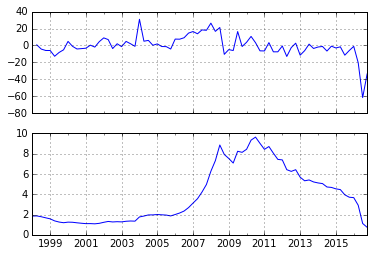

In [401]:
foreclosure2 = foreclosure.T
fig, ax = plt.subplots(2, sharex = True)
f_change.plot(ax = ax[0], grid = True)
foreclosure2['United States'].plot(ax=ax[1], grid = True)

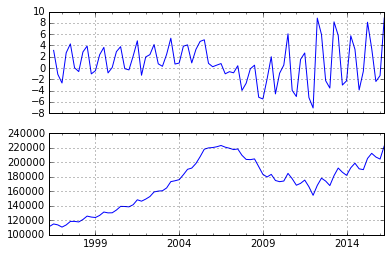

In [398]:
sale_price2 = sale_price.T
fig, ax = plt.subplots(2, sharex = True)
sp_change.plot(ax = ax[0], grid = True)
sale_price2['United States'].plot(ax = ax[1], grid = True)

In [377]:
f_change = foreclosure.T
f_change = f_change['United States']
f_change = 100* f_change.pct_change()
f_change.head(5)

1998Q1         NaN
1998Q2    0.660066
1998Q3   -4.326794
1998Q4   -5.986891
1999Q1   -6.021552
Freq: Q-DEC, Name: United States, dtype: float64

## Median Price Cut (%)

In [104]:
#Median Price Cut (%)

url5 = 'http://files.zillowstatic.com/research/public/Metro/Metro_'
url6 = 'MedianPctOfPriceReduction_AllHomes.csv'
url7 = url5 + url6

price_cut = pd.read_csv(url4)

# Because we got our data from a centralized source, we could use the same cleanup techniques
price_cut = price_cut.drop(['RegionID','SizeRank'], axis=1) # Here we dropped the given 'RegionID', which the source used
price_cut = price_cut.set_index('RegionName') # We wanted to set the index equal to the population size of metro areas
price_cut = price_cut.groupby(pd.PeriodIndex(price_cut.columns, freq='Q'), axis=1).mean()
price_cut.head(5)

,1998Q1,1998Q2,1998Q3,1998Q4,1999Q1,1999Q2,1999Q3,1999Q4,2000Q1,2000Q2,...,2014Q3,2014Q4,2015Q1,2015Q2,2015Q3,2015Q4,2016Q1,2016Q2,2016Q3,2016Q4
RegionName,,,,,,,,,,,,,,,,,,,,,
United States,1.848300,1.860500,1.7800,1.673433,1.572667,1.370933,1.257033,1.191567,1.248100,1.235067,...,4.713067,4.671333,4.530033,4.455433,3.941533,3.703900,3.663633,2.914500,1.115967,0.7393
"New York, NY",0.490133,0.563233,0.6011,0.571500,0.590500,0.625667,0.600100,0.626800,0.612700,0.673533,...,1.599167,1.911600,1.988333,2.499367,2.490133,2.925600,2.933633,2.004933,0.510800,0.2608
"Los Angeles-Long Beach-Anaheim, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.111400,2.080300,2.072067,2.050367,1.771400,1.672100,1.749700,1.405000,0.766633,0.6834
"Dallas-Fort Worth, TX",2.131067,2.136100,1.8363,1.693967,1.719733,1.779467,1.663433,1.629300,1.723167,1.600933,...,4.149367,4.042833,4.399000,3.714467,2.982900,3.161500,3.429100,2.596667,0.799333,0.0867
"Philadelphia, PA",3.319967,3.625167,2.2900,3.081200,3.212200,1.083033,0.734167,0.887100,0.909767,0.930267,...,5.143300,4.871733,3.957100,4.187833,3.984700,3.645267,4.883467,2.766133,0.142400,0.0599


## Rent/Sq. Foot

In [105]:
url6 = 'http://files.zillowstatic.com/research/public/Metro/Metro_ZriPerSqft_AllHomes.csv'
rent = pd.read_csv(url6)

rent = rent.set_index('RegionName')
rent = rent.drop(['RegionID','SizeRank'], axis = 1) # data clean up
rent = rent.groupby(pd.PeriodIndex(rent.columns, freq='Q'), axis=1).mean()
rent.head(5)

,2010Q4,2011Q1,2011Q2,2011Q3,2011Q4,2012Q1,2012Q2,2012Q3,2012Q4,2013Q1,...,2014Q3,2014Q4,2015Q1,2015Q2,2015Q3,2015Q4,2016Q1,2016Q2,2016Q3,2016Q4
RegionName,,,,,,,,,,,,,,,,,,,,,
United States,0.817,0.820000,0.820000,0.818667,0.818000,0.818667,0.822000,0.824000,0.827333,0.832000,...,0.860000,0.877333,0.886667,0.896000,0.906667,0.906000,0.912667,0.923333,0.924667,0.926
"New York, NY",NaN,NaN,NaN,NaN,1.310000,1.306000,1.306667,1.307333,1.306000,1.321333,...,1.383333,1.416000,1.424667,1.436667,1.452000,1.469333,1.485333,1.496000,1.505333,1.506
"Los Angeles-Long Beach-Anaheim, CA",1.510,1.510000,1.510000,1.512000,1.514000,1.516667,1.523333,1.524667,1.532667,1.546000,...,1.629333,1.672000,1.708000,1.734000,1.756667,1.770667,1.798667,1.828667,1.848000,1.856
"Chicago, IL",1.053,1.055333,1.050000,1.046000,1.042667,1.042000,1.046000,1.051333,1.060667,1.066667,...,1.111333,1.122000,1.122000,1.127333,1.137333,1.138667,1.144000,1.152667,1.156000,1.156
"Dallas-Fort Worth, TX",0.730,0.738667,0.739333,0.738000,0.740667,0.741333,0.746000,0.752667,0.762000,0.768000,...,0.811333,0.826667,0.838000,0.847333,0.855333,0.858000,0.866000,0.877333,0.887333,0.890


In [199]:
rent_change = rent.T
rent_change = rent_change['United States']
rent_change.head(5)
rent_change = 100* rent_change.pct_change()
rent_change.head(5)

2010Q4         NaN
2011Q1    0.367197
2011Q2    0.000000
2011Q3   -0.162602
2011Q4   -0.081433
Freq: Q-DEC, Name: United States, dtype: float64

## Inventory Age

In [364]:
urlinv = 'http://files.zillowstatic.com/research/public/Metro/AgeOfInventory_Metro_Public.csv'
inv_age = pd.read_csv(urlinv)

inv_age = inv_age.drop(['RegionType','StateFullName','DataTypeDescription',],axis=1)
inv_age = inv_age.set_index('RegionName')
inv_age = inv_age.groupby(pd.PeriodIndex(inv_age.columns, freq='Q'), axis=1).mean()
inv_age.head(5)

,2012Q1,2012Q2,2012Q3,2012Q4,2013Q1,2013Q2,2013Q3,2013Q4,2014Q1,2014Q2,2014Q3,2014Q4,2015Q1,2015Q2,2015Q3,2015Q4,2016Q1,2016Q2,2016Q3,2016Q4
RegionName,,,,,,,,,,,,,,,,,,,,
United States,112.000000,81.333333,90.666667,99.000000,98.666667,74.666667,78.333333,90.000000,99.333333,68.333333,77.666667,93.666667,99.333333,63.666667,73.666667,89.333333,91.666667,67.000000,78.666667,87.0
"New York, NY",124.666667,84.666667,103.666667,117.666667,112.000000,73.666667,85.666667,92.333333,96.666667,66.666667,82.666667,94.333333,94.000000,62.000000,80.333333,94.666667,91.333333,65.333333,85.000000,91.0
"Chicago, IL",133.666667,92.000000,96.000000,108.666667,105.333333,70.000000,70.666667,84.333333,92.333333,54.000000,67.666667,88.000000,86.333333,56.333333,72.000000,90.333333,91.000000,59.000000,76.000000,86.0
"Dallas-Fort Worth, TX",93.333333,65.333333,71.333333,83.666667,71.666667,53.333333,55.000000,69.333333,66.000000,44.333333,50.333333,65.666667,55.666667,41.000000,45.666667,62.333333,59.666667,47.000000,51.666667,62.0
"Philadelphia, PA",118.666667,85.666667,101.666667,111.666667,109.333333,74.000000,85.333333,94.000000,103.333333,66.333333,82.666667,96.333333,103.000000,59.666667,77.666667,91.666667,92.666667,67.000000,82.000000,85.0


In [365]:
ia_change = inv_age.T
ia_change = ia_change['United States']
ia_change.head(5)
ia_change = 100* ia_change.pct_change()
ia_change.head(15)

2012Q1          NaN
2012Q2   -27.380952
2012Q3    11.475410
2012Q4     9.191176
2013Q1    -0.336700
2013Q2   -24.324324
2013Q3     4.910714
2013Q4    14.893617
2014Q1    10.370370
2014Q2   -31.208054
2014Q3    13.658537
2014Q4    20.600858
2015Q1     6.049822
2015Q2   -35.906040
2015Q3    15.706806
Freq: Q-DEC, Name: United States, dtype: float64

# Where we go from here

Now that we have cleaned up the data a little bit, we are in a good place to move forward with our analysis. However, we should also note that we will have to do more data cleaning as we move forward depending on the type of analysis that we would want to make. For example, while most of the data is in monthly data, the negative equity data that we are using is in quarters, so we will have to adjust the data to fit that timeseries when the time comes. In addition, we also will have to merge some of our datasets and clean up any inconsistencies between the two that we merge. This would primarily be in ensuring that the data is the same acrosss the two samples. Given that we are not sure how many data samples we would like for each analysis, we have decided at this stage to not make this step of consolidation and merging quite yet, as we would like to wait and see if we should use as many data points as possible or just the ones that are consistent across all samples.

# Merging Dataframes for Analysis

In [111]:
sp16Q2 = sale_price.xs("2016Q2", axis=1)
sp16Q2.columns = ['SalePrice']
sp16Q2

RegionName
United States                         222658.333333
New York, NY                          388233.333333
Los Angeles-Long Beach-Anaheim, CA    565933.333333
Chicago, IL                           234108.333333
Dallas-Fort Worth, TX                 221461.416667
Philadelphia, PA                      230066.666667
Washington, DC                        388885.000000
Miami-Fort Lauderdale, FL             241378.333333
Atlanta, GA                           201668.333333
Boston, MA                            312166.666667
San Francisco, CA                     732600.000000
Detroit, MI                           164811.666667
Riverside, CA                         307416.666667
Phoenix, AZ                           223382.333333
Seattle, WA                           377664.166667
Minneapolis-St Paul, MN               231181.666667
San Diego, CA                         498483.333333
St. Louis, MO                         175092.500000
Tampa, FL                             178483.333333
B

In [110]:
ne16Q2 = neg_equity.xs("2016Q2", axis=1)
ne16Q2.columns = ['Negative Equity']
ne16Q2.head(5)

RegionName
United States                         0.121129
New York, NY                          0.110467
Los Angeles-Long Beach-Anaheim, CA    0.060904
Chicago, IL                           0.189739
Dallas-Fort Worth, TX                 0.047703
Name: 2016Q2, dtype: float64

In [112]:
fc16Q2 = foreclosure.xs("2016Q2", axis=1)
fc16Q2.head(5)

RegionName
United States                         2.914500
New York, NY                          2.004933
Los Angeles-Long Beach-Anaheim, CA    1.405000
Dallas-Fort Worth, TX                 2.596667
Philadelphia, PA                      2.766133
Name: 2016Q2, dtype: float64

In [114]:
mpc16Q2 = price_cut.xs("2016Q2", axis=1)
mpc16Q2.head(5)

RegionName
United States                         2.914500
New York, NY                          2.004933
Los Angeles-Long Beach-Anaheim, CA    1.405000
Dallas-Fort Worth, TX                 2.596667
Philadelphia, PA                      2.766133
Name: 2016Q2, dtype: float64

In [116]:
rent16Q2 = rent.xs("2016Q2", axis=1)
rent16Q2.head(5)

RegionName
United States                         0.923333
New York, NY                          1.496000
Los Angeles-Long Beach-Anaheim, CA    1.828667
Chicago, IL                           1.152667
Dallas-Fort Worth, TX                 0.877333
Name: 2016Q2, dtype: float64

In [118]:
ia16Q2 = inv_age.xs("2016Q2", axis=1)
ia16Q2.head(5)

RegionName
United States            67.000000
New York, NY             65.333333
Chicago, IL              59.000000
Dallas-Fort Worth, TX    47.000000
Philadelphia, PA         67.000000
Name: 2016Q2, dtype: float64

In [129]:
Q2_2016 = pd.concat([sp16Q2, ne16Q2, fc16Q2, mpc16Q2, rent16Q2, ia16Q2 ], axis=1)
Q2_2016.columns = ['Sale Price', 'Negative Equity', 'Foreclosures', 'Median Price Cut', 'Rent', 'Inventory Age']
print(Q2_2016.shape)
Q2_2016.head(5)

(895, 6)


,Sale Price,Negative Equity,Foreclosures,Median Price Cut,Rent,Inventory Age
"Aberdeen, WA",NaN,0.160366,NaN,NaN,0.676000,66.666667
"Abilene, TX",NaN,0.100802,NaN,NaN,0.691333,NaN
"Ada, OK",NaN,0.148288,NaN,NaN,0.636667,70.333333
"Adrian, MI",NaN,0.146487,NaN,NaN,0.723333,78.000000
"Akron, OH",136281.15,0.126528,2.830333,2.830333,0.809333,NaN


In [172]:
Q2_2016 = Q2_2016.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False) #drops NA Values
Q2_2016.head(5)

,"Albany, NY","Allentown, PA","Atlantic City, NJ","Bakersfield, CA","Baltimore, MD","Binghamton, NY","Boulder, CO","California-Lexington Park, MD","Canton, OH","Cape Cod, MA",...,"Utica, NY","Ventura, CA","Virginia Beach, VA","Visalia, CA","Washington, DC","Winston-Salem, NC","Worcester, MA","Yakima, WA","Yuba City, CA","Yuma, AZ"
Sale Price,193983.333333,171961.666667,178150.000000,203083.333333,279835.666667,103806.800000,432831.666667,275388.700000,123666.666667,380025.000000,...,107025.666667,535550.000000,231270.150000,192050.000000,388885.000000,143333.333333,198716.666667,190362.633333,237600.000000,147314.500000
Negative Equity,0.109790,0.144797,0.293752,0.173201,0.167095,0.159526,0.046905,0.216770,0.124372,0.060331,...,0.130769,0.067295,0.198567,0.158661,0.141706,0.111733,0.116906,0.085328,0.124508,0.281700
Foreclosures,4.550767,2.765733,6.114267,4.256467,7.276100,2.260733,0.727733,4.069700,3.085033,1.023067,...,4.454200,1.338300,1.501567,3.244300,3.808867,4.196000,5.287667,4.088833,2.923333,4.108000
Median Price Cut,4.550767,2.765733,6.114267,4.256467,7.276100,2.260733,0.727733,4.069700,3.085033,1.023067,...,4.454200,1.338300,1.501567,3.244300,3.808867,4.196000,5.287667,4.088833,2.923333,4.108000
Rent,1.068000,0.904000,1.074000,0.866000,1.215333,0.856000,1.275333,0.962667,0.720667,1.339333,...,0.860000,1.565333,0.881333,0.810000,1.366000,0.673333,1.106667,0.818000,0.814667,0.693333


# Data Analysis

In [159]:
sale_price.min(axis=1).head(15)

RegionName
United States                         110630.833333
New York, NY                          157600.000000
Los Angeles-Long Beach-Anaheim, CA    480883.333333
Chicago, IL                           133558.333333
Dallas-Fort Worth, TX                  93177.483333
Philadelphia, PA                      103666.666667
Washington, DC                        156248.333333
Miami-Fort Lauderdale, FL              91233.333333
Atlanta, GA                           105483.333333
Boston, MA                            148783.333333
San Francisco, CA                     228250.000000
Detroit, MI                            94558.333333
Riverside, CA                         107191.666667
Phoenix, AZ                           104555.000000
Seattle, WA                           147874.583333
dtype: float64

In [160]:
sale_price.max(axis=1).head(15)

RegionName
United States                         223250.000000
New York, NY                          427683.333333
Los Angeles-Long Beach-Anaheim, CA    565933.333333
Chicago, IL                           249966.666667
Dallas-Fort Worth, TX                 221461.416667
Philadelphia, PA                      238016.666667
Washington, DC                        401339.166667
Miami-Fort Lauderdale, FL             279333.333333
Atlanta, GA                           204716.666667
Boston, MA                            374025.000000
San Francisco, CA                     732600.000000
Detroit, MI                           169683.333333
Riverside, CA                         399958.333333
Phoenix, AZ                           259766.666667
Seattle, WA                           377664.166667
dtype: float64

In [161]:
spq = sale_price.T

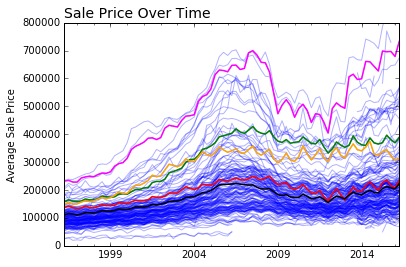

In [162]:
fig, ax = plt.subplots()
spq.plot(ax=ax, 
         legend=False, color='blue', alpha=0.3, 
         ylim=(0,800000)
        )
ax.set_ylabel('Average Sale Price')
ax.set_xlabel('')
ax.set_title('Sale Price Over Time', fontsize=14, loc='left')
spq['San Francisco, CA'].plot(ax=ax, color='magenta', linewidth=1.5)
spq['New York, NY'].plot(ax=ax, color='green', linewidth=1.5)
spq['Chicago, IL'].plot(ax=ax, color='red', linewidth=1.5)
spq['Boston, MA'].plot(ax=ax, color='orange', linewidth=1.5)
spq['United States'].plot(ax=ax, color='black', linewidth=1.5)

In [163]:
spdelta = spq.T.max(axis=1)-spq.T.min(axis=1)
spq.tail(50)

RegionName,United States,"New York, NY","Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Dallas-Fort Worth, TX","Philadelphia, PA","Washington, DC","Miami-Fort Lauderdale, FL","Atlanta, GA","Boston, MA",...,"Ludington, MI","Weatherford, OK","The Dalles, OR","Steamboat Springs, CO","Parsons, KS","Othello, WA","Fairfield, IA","Vineyard Haven, MA","Winnemucca, NV","Craig, CO"
2004Q1,176083.333333,309930.000000,NaN,202000.000000,141040.250000,167212.166667,267050.000000,174655.000000,159700.000000,302700.000000,...,NaN,NaN,NaN,NaN,33115.000000,NaN,NaN,NaN,NaN,NaN
2004Q2,182893.283333,323836.666667,NaN,207203.333333,146357.183333,172683.333333,294666.666667,187600.000000,164783.333333,318908.333333,...,NaN,NaN,NaN,NaN,45522.250000,NaN,NaN,NaN,NaN,NaN
2004Q3,190375.383333,345958.333333,NaN,221030.000000,149239.750000,191533.333333,325016.666667,198978.333333,169388.333333,337021.666667,...,NaN,NaN,NaN,NaN,40443.166667,NaN,NaN,NaN,NaN,NaN
2004Q4,192079.500000,349753.966667,NaN,218225.000000,147251.566667,188288.333333,323950.000000,205145.000000,166638.666667,327316.666667,...,NaN,NaN,NaN,NaN,45745.000000,NaN,NaN,NaN,NaN,NaN
2005Q1,198396.166667,357959.033333,NaN,217200.000000,147467.016667,190486.666667,334071.666667,215871.666667,168385.000000,321616.666667,...,NaN,NaN,NaN,NaN,35387.500000,NaN,NaN,NaN,NaN,NaN
2005Q2,207741.666667,369138.333333,NaN,223975.000000,151330.800000,197041.666667,368094.166667,235010.000000,172215.000000,334705.000000,...,NaN,NaN,NaN,NaN,37241.666667,NaN,NaN,NaN,NaN,NaN
2005Q3,218125.000000,390678.333333,NaN,237633.333333,155228.783333,221033.333333,401339.166667,250221.666667,179033.333333,354561.666667,...,NaN,NaN,NaN,NaN,44363.333333,NaN,NaN,NaN,NaN,NaN
2005Q4,219916.666667,394400.000000,NaN,234300.000000,153281.750000,218606.666667,390566.666667,256431.666667,178921.666667,343683.333333,...,NaN,NaN,NaN,NaN,36590.000000,NaN,NaN,NaN,NaN,NaN
2006Q1,220397.666667,398871.333333,NaN,233016.666667,152533.383333,211043.333333,381850.000000,262533.333333,178850.000000,335250.000000,...,NaN,NaN,NaN,NaN,35250.000000,NaN,NaN,NaN,NaN,NaN
2006Q2,221521.000000,403545.000000,NaN,236550.000000,157486.183333,216841.666667,395350.000000,268250.000000,184969.000000,340750.000000,...,NaN,NaN,NaN,NaN,51045.000000,NaN,NaN,NaN,NaN,NaN


In [164]:
spdelta.describe()

count       205.000000
mean     132364.794095
std      104095.721850
min           0.000000
25%       60195.833333
50%      105711.666667
75%      169850.000000
max      647200.000000
dtype: float64

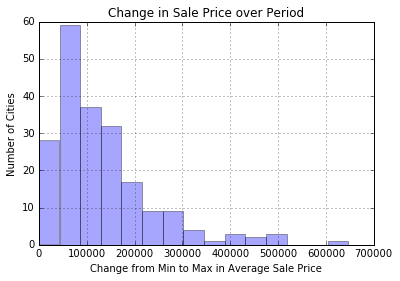

In [106]:
fig, ax = plt.subplots()
spdelta.hist(bins=15, ax=ax, alpha=0.35)
ax.set_xlabel('Change from Min to Max in Average Sale Price')
ax.set_ylabel('Number of Cities')
ax.set_title('Change in Sale Price over Period')

ymin, ymax = ax.get_ylim()

In [165]:
spdelta.sort_values(ascending=False)[:20]

RegionName
San Jose, CA           647200.000000
San Francisco, CA      504350.000000
Santa Cruz, CA         491516.666667
Kapaa, HI              477166.666667
Napa, CA               438291.666667
Salinas, CA            433700.000000
Kahului, HI            430340.683333
Ventura, CA            412600.000000
San Luis Obispo, CA    391591.666667
Santa Rosa, CA         372583.333333
San Diego, CA          342633.333333
Hilo, HI               322948.516667
Vallejo, CA            319094.000000
Stockton, CA           313507.800000
Stamford, CT           297193.116667
Riverside, CA          292766.666667
Sacramento, CA         281216.666667
Merced, CA             278783.333333
New York, NY           270083.333333
Modesto, CA            270066.666667
dtype: float64

In [166]:
spd = spdelta.sort_values(ascending=False)[:10]
#want to look at the effect of rising sale prices on foreclosures

In [167]:
sp_ex10= sale_price[11:].T
sp_ex30= sale_price[31:].T

In [168]:
sp_ex10.head(5)

RegionName,"Detroit, MI","Riverside, CA","Phoenix, AZ","Seattle, WA","Minneapolis-St Paul, MN","San Diego, CA","St. Louis, MO","Tampa, FL","Baltimore, MD","Denver, CO",...,"Ludington, MI","Weatherford, OK","The Dalles, OR","Steamboat Springs, CO","Parsons, KS","Othello, WA","Fairfield, IA","Vineyard Haven, MA","Winnemucca, NV","Craig, CO"
1996Q2,118600.000000,107883.333333,104555.000000,147874.583333,113116.666667,158425.000000,93343.083333,74811.666667,119815.416667,128982.183333,...,NaN,NaN,NaN,NaN,26614.7059,NaN,NaN,NaN,NaN,NaN
1996Q3,123421.666667,107866.666667,107127.500000,150539.166667,114633.333333,157766.666667,97491.666667,79808.333333,124420.000000,129698.816667,...,NaN,NaN,NaN,NaN,28898.7500,NaN,NaN,NaN,NaN,NaN
1996Q4,121111.666667,109650.000000,107067.166667,151816.666667,112295.000000,156050.000000,94666.666667,79525.000000,123196.666667,130216.666667,...,NaN,NaN,NaN,NaN,19500.0000,NaN,NaN,NaN,NaN,NaN
1997Q1,111483.333333,107191.666667,107502.333333,155085.416667,108831.833333,156616.666667,91854.000000,76466.666667,115869.416667,127691.666667,...,NaN,NaN,NaN,NaN,21307.6923,NaN,NaN,NaN,NaN,NaN
1997Q2,119021.666667,107808.333333,109408.333333,157206.250000,111016.166667,160558.333333,92783.716667,76376.000000,117707.250000,129295.000000,...,NaN,NaN,NaN,NaN,19563.2353,NaN,NaN,NaN,NaN,NaN


### After sale price change it would make sense to look at foreclosure rates -Drew

In [169]:
fcq = foreclosure.T
fcq10 = fcq('San Jose, CA', 'San Francisco, CA', 'Santa Cruz, CA', 'Kapaa, HI', 'Napa, CA', 'Salinas, CA', 'Kahului, HI'
           'Ventura, CA', 'San Luis Obispo, CA', 'Santa Rosa, CA')

TypeError: 'DataFrame' object is not callable

In [170]:
fcq.describe()

C:\Users\Jon\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning:

Invalid value encountered in percentile



RegionName,United States,"New York, NY","Los Angeles-Long Beach-Anaheim, CA","Dallas-Fort Worth, TX","Philadelphia, PA","Washington, DC","San Francisco, CA","Riverside, CA","Phoenix, AZ","Seattle, WA",...,"Vincennes, IN","Summit Park, UT","Jackson, OH","Dayton, TN","Ludington, MI","Hailey, ID","Steamboat Springs, CO","Helena, AR","Vineyard Haven, MA","Craig, CO"
count,76.000000,76.000000,13.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,...,1.000000,11.000000,2.000000,12.000000,3.000000,3.000000,1.00,2.0000,11.000000,1.0000
mean,3.888247,0.873983,1.812033,5.684172,2.266515,3.952190,4.816072,12.397601,10.798205,5.077568,...,9.360567,1.130642,1.232300,3.636728,0.373900,58.575033,0.37,0.8299,1.362515,2.0753
std,2.745652,0.638997,0.569079,3.312142,1.184716,3.655995,6.198554,12.886118,13.753625,4.389758,...,NaN,0.616388,0.566534,2.164160,0.013803,39.484008,NaN,0.0000,0.521748,NaN
min,0.739300,0.260800,0.683400,0.086700,0.059900,0.240000,0.258967,0.469367,0.405433,0.959300,...,9.360567,0.505400,0.831700,0.538300,0.365000,35.587200,0.37,0.8299,0.647200,2.0753
25%,1.356425,0.449900,NaN,2.550892,1.135358,1.229867,0.476183,3.478625,1.947683,1.587333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.799133,0.578983,NaN,5.468550,2.420667,2.383983,1.532550,6.260917,3.415633,2.830483,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,6.254392,1.224125,NaN,8.782092,2.974425,4.985150,7.490400,16.593633,16.526642,8.215833,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,9.628667,2.933633,2.461500,11.247633,5.143300,16.015700,25.219900,59.572900,44.306167,16.904967,...,9.360567,2.589933,1.632900,8.836800,0.389800,104.166700,0.37,0.8299,2.223500,2.0753


In [176]:
sp16 = Q2_2016.T
sp16 = sp16['Sale Price']
sp16.head(5)

Albany, NY           193983.333333
Allentown, PA        171961.666667
Atlantic City, NJ    178150.000000
Bakersfield, CA      203083.333333
Baltimore, MD        279835.666667
Name: Sale Price, dtype: float64

In [ ]:
# relationship between inventory, median price cut and median sale price
# median sale vs rent
# negative equity and media price vut
# foreclusre rate vs. median sale price

# Graph Analysis

In [185]:
#df_saleprice2 = sale_price.set_index('RegionName')
#df_saleprice2
sale_price2 = sale_price
sale_price2.head(5)

sale_price2 = sale_price.reset_index()
sale_price2 = sale_price2.set_index('RegionName')
sale_price2 = sale_price2.drop('SizeRank',axis = 1)
sale_price2 = sale_price2.T
sale_price2['Seattle, WA'].plot()

DateParseError: Unknown datetime string format, unable to parse: REGIONNAME

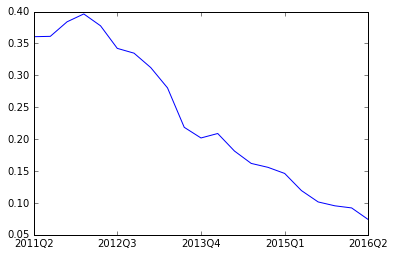

In [145]:
df_negativeequity2 = df_negativeequity.reset_index()
df_negativeequity2 = df_negativeequity2.set_index('RegionName')
df_negativeequity2 = df_negativeequity2.T
df_negativeequity2['Seattle, WA'].plot()

In [144]:
neg_equity2 = neg_equity.reset_index()
neg_equity2 = neg_equity2.set_index('RegionName')
neg_quity2 = neg_equity2.T
neg_equity2['Seattle, WA'].plot()

KeyError: 'Seattle, WA'

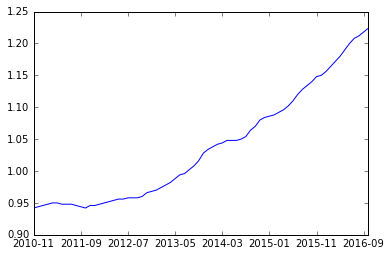

In [40]:
df_rent2 = df_rent.reset_index()
df_rent2 = df_rent2.set_index('RegionName')
df_rent2 = df_rent2.T
df_rent2['Seattle, WA'].plot()

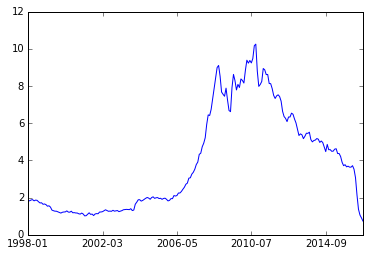

In [187]:
df_foreclosures2 = df_foreclosures.reset_index()
df_foreclosures2 = df_foreclosures2.set_index('RegionName')
df_foreclosures2 = df_foreclosures2.T
df_foreclosures2['United States'].plot()

In [188]:
df_medpricecut2 = df_medpricecut.reset_index()
df_medpricecut2 = df_medpricecut2.set_index('RegionName')
df_medpricecut2 = df_medpricecut2.T
df_medpricecut2['Seattle, WA'].plot()

DateParseError: Unknown datetime string format, unable to parse: REGIONNAME

In [190]:
df_invage2 = df_invage.reset_index()
df_invage2 = df_invage2.set_index('RegionName')
df_invage2 = df_invage2.T
df_invage2['United States'].plot()


,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,...,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10
RegionName,,,,,,,,,,,,,,,,,,,,,
United States,120,114,102,84,79,81,86,92,94,95,...,103,98,74,68,65,68,74,78,84,87
"New York, NY",136,126,112,86,81,87,95,106,110,111,...,105,99,70,63,64,69,78,87,90,91
"Chicago, IL",141,137,123,99,89,88,91,97,100,102,...,108,103,62,57,57,63,70,76,82,86
"Dallas-Fort Worth, TX",109,98,73,65,66,65,68,70,76,80,...,72,63,44,46,47,48,49,50,56,62
"Philadelphia, PA",132,119,105,84,84,89,96,104,105,106,...,102,101,75,64,66,71,78,84,84,85


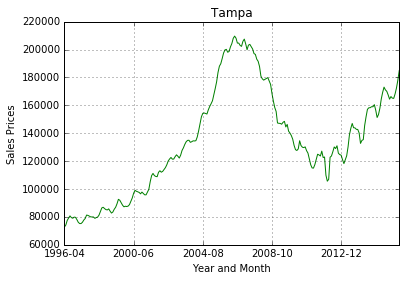

In [45]:
fig, ax = plt.subplots()
df_saleprice2['Tampa, FL'].plot(ax=ax,color = 'green',grid=True)
ax.set_xlabel('Year and Month')
ax.set_ylabel('Sales Prices')
ax.set_title('Tampa')

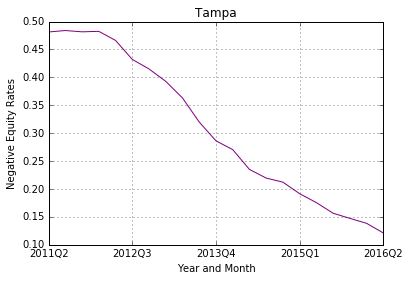

In [46]:
fig, ax = plt.subplots()
df_negativeequity2['Tampa, FL'].plot(ax=ax,color='purple',grid=True)
ax.set_title('Tampa')
ax.set_xlabel('Year and Month')
ax.set_ylabel('Negative Equity Rates')


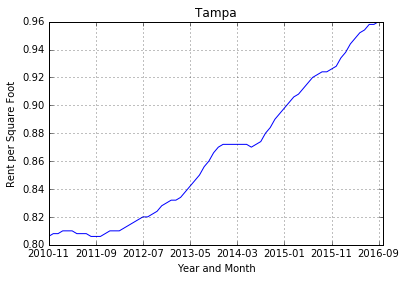

In [47]:
fig, ax = plt.subplots()
df_rent2['Tampa, FL'].plot(ax=ax,grid=True)
ax.set_xlabel('Year and Month')
ax.set_ylabel('Rent per Square Foot')
ax.set_title('Tampa')

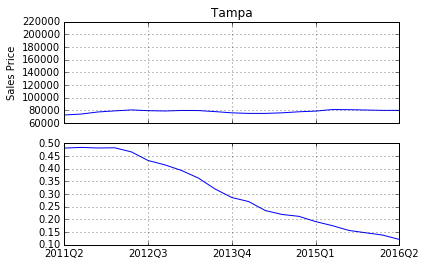

In [48]:
fig, ax = plt.subplots(2, sharex=True)
df_saleprice2['Tampa, FL'].plot(ax=ax[0],grid=True)
ax[0].set_ylabel('Sales Price')
ax[0].set_title('Tampa')
df_negativeequity2['Tampa, FL'].plot(ax=ax[1],grid=True)
#pd merge
# pd.to_datetime() on date columns in each dataframe
# set index to date column
# `resample` the monthly data to be quarterly
# combine one dataframe
# call df["2011":]

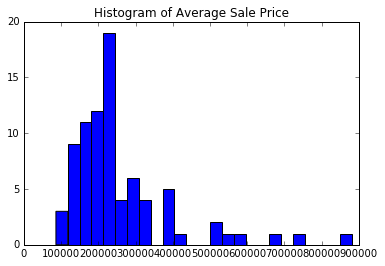

In [147]:
fig, ax = plt.subplots()

ax.hist(Q2_2016["Sale Price"], bins=25)

ax.set_title("Histogram of Average Sale Price")
plt.show()


In [148]:
#Q2_2016 = Q2_2016.T

In [149]:
sns.(x="Median Price Cut", y="Inventory Age", data=df_2016Q2)

SyntaxError: invalid syntax (<ipython-input-149-df39b7fc57ba>, line 1)

In [151]:
fig, ax = plt.subplots()

as.bar(Q2_2016['Median Price Cut'])

SyntaxError: invalid syntax (<ipython-input-151-fd35c6589516>, line 3)

KeyError: 'Median Price Cut'

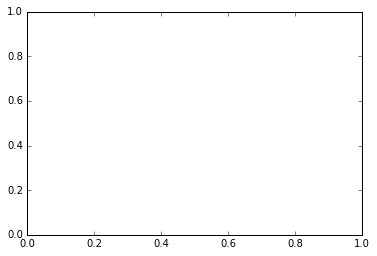

In [154]:
Q2_2016.plot.scatter('Median Price Cut', 'Inventory Age')

KeyError: 'Sale Price'

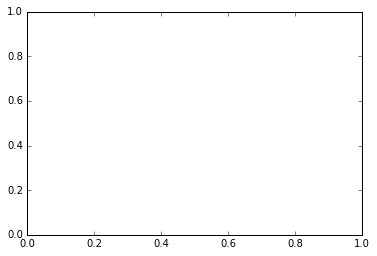

In [378]:
Q2_2016.plot.scatter('Sale Price', 'Rent')

In [379]:
df_2016Q2.plot.scatter('Negative Equity', 'Foreclosures')

NameError: name 'df_2016Q2' is not defined

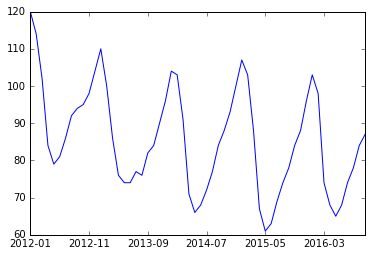

In [174]:
df_invage2 = df_invage.reset_index()
df_invage2 = df_invage2.set_index('RegionName')
df_invage2 = df_invage2.T
df_invage2['United States'].plot()


In [ ]:
plt.figure()
df.A.plot(['United States'])
df.B.plot(secondary_y=True, style='g')
#foreclosures vs sale price